# 선형모델(Linear Model)

이 노트북은 안드레아스 뮐러(저)의 Introduction to Machince Leaning with Python을 기반으로 작성 되었다.

선형모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.

### 회귀의 선형 모델

회귀의 경우 선형 모델을 위한 일반화된 예측 함수는 다음과 같다.

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx $$

x는 데이터 포인트에 대한 특성을 나타내고 w는 학습할 파라미터를 나타낸다. y는 예측값이다. 

In [7]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pandas as pd
import numpy as np

w[0]: 0.393906  b: -0.031804


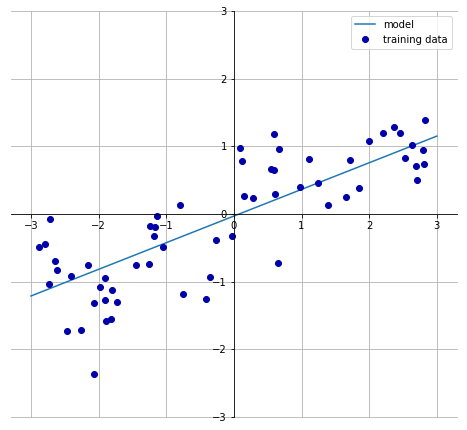

In [4]:
mglearn.plots.plot_linear_regression_wave()

1차원 wave 데이터셋으로 파리미터를 직선처럼 학습시킨 것이다.

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원(특성이 더 많은것)에서는 초평면이 되는 회귀모델의 특징을 가지고 있다.

# 선형 회귀(Linear Regression)

선형 회귀(Linear regression) 또는 OLS는 가장 간단하고 오래된 회귀용 선형 알고리즘이다. 선형 회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(Mean Square Error)를 최소화하는 파라미터를 찾는 것이다. 

퍙균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다. 선형회귀는 매개변수가 없는 것이 장점이지만 그래서 모델의 복잡도를 제어할 방법이 없다.

In [10]:
from sklearn.linear_model import LinearRegression
x,y = mglearn.datasets.make_wave(n_samples=60)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [13]:
lr = LinearRegression().fit(x_train,y_train)

기울기 파라미터(w)는 가중치(weight) 또는 계수라고 하며 lr 객체의 coef_속성에 저장되어 있고 편향(offset) 또는 절편 파라미터 b는 intercept_ 속성에 저장되어 있다.

In [14]:
print('ir coef_:{}'.format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

ir coef_:[ 0.39390555]
lr.intercept_:-0.031804343026759746


훈련 세트와 테스트 세트 성능 확인하기

In [15]:
print("훈련 세트 점수: {:.2f}".format(lr.score(x_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(x_test,y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


그리 높은 점수는 아니지만 훈련과 테스트 세트의 점수차가 거의 없는 것을 보아 과대적합이 일어나진 않았다. 하지만 특성이 많아져 복잡해질 경우 과대적합(Overfitting)이 일어날 가능성이 크다.

In [24]:
#보스턴 데이터셋 로드
x,y = mglearn.datasets.load_extended_boston()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 0)

In [25]:
lr = LinearRegression().fit(x_train,y_train)

In [26]:
print("훈련 세트 점수:{:.2f}".format(lr.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(x_test,y_test)))

훈련 세트 점수:0.95
테스트 세트 점수:0.61


훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야한다.

기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 릿지(Ridge) 회귀이다.

# 릿지 회귀(Ridge Regression)

릿지(Ridge)도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측함수를 사용한다. 하지만 릿지 회귀애서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다. 가중치의 절대값을 가능한 작게하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다. 이러한 제약을 규제(regularization)이라고 한다. 규제란 모델이 Overfitting되지 않도록 강제로 제한한다는 의미이다.

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train,y_train)


훈련 세트 점수:0.89
테스트 세트 점수:0.75


훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높다. 선형 회귀는 이 데이터셋에 과대적합하지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어진다. 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모댈이 된다.

사용자는 Ridge의 매개변수 alpha를 이용해서 훈련세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있다.alpha값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.

In [32]:
#alpha 10으로 설정 
ridge10 = Ridge(alpha=10).fit(x_train,y_train)

In [33]:
print("훈련 세트 점수:{:.2f}".format(ridge10.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(x_test,y_test)))

훈련 세트 점수:0.79
테스트 세트 점수:0.64


alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀린다. 아주 작은 alpha 값은 계수를 거의 제안하지 않으므로 Linear Regression으로 만든 모델과 거의 비슷하다.

In [34]:
ridge01 =Ridge(alpha=0.1).fit(x_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge01.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge01.score(x_test,y_test)))

훈련 세트 점수:0.93
테스트 세트 점수:0.77


규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것이다. 밑의 그래프는 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 Linear Regression과 Ridge(alpha=1)을 적용한 것이다.

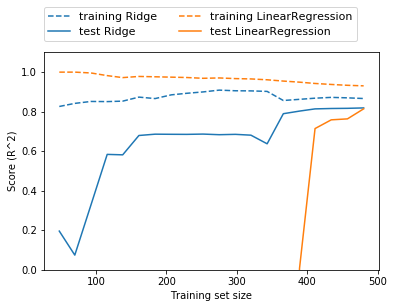

In [35]:
mglearn.plots.plot_ridge_n_samples()

두 메들의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형회귀가 릿지 회귀를 따라잡는다. 즉 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지회귀와 선형회귀의 성능이 같아질 것이라는 것이다. 

# 라쏘 회귀(Lasso Regression)

선형회귀애 규제를 적용하는데 Ridge의 대안으로는 Lasso가 있다. 릿지회귀에서와 같이 라쏘도 계수를 0에 가깝게 만들려고 한다. 하지만 방식이 조금 다르며 이를 L!규제라고 한다. L!규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말로 0이된다. 이말은 모델에서 완전히 제외되는 특성이 생긴다는 뜻이다. 어떻게 보면 Feature Selection이 자동으로 이뤄진다고 볼수 있다. 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다. 

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(x_train,y_train)


In [37]:
print('훈련 세트 점수:{:.2f}'.format(lasso.score(x_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lasso.score(x_test,y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso.coef_!=0)))

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 수:4


위와 같이 훈련과 테스트 점수 모두 좋지 않다. 이는 과소적합이며 104개의 특성 중 4개만을 사용한 것을 볼 수 있다. Ridge과 마찬가지로 Lasso도 계수를 얼마나 강하게 0으로 보낼지 조절하는 매개변수 alpha가 있다. 다음으로 alpha값을 줄여보도록 하겠다.

In [39]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(x_train,y_train)

In [40]:
print('훈련 세트 점수:{:.2f}'.format(lasso001.score(x_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lasso001.score(x_test,y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso001.coef_!=0)))

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 수:33


alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련세트와 테스트 세트에서의 성능이 좋아진다. 성능은 Ridge보다 조금 나은데 사용된 특성은 33개 뿐이어서 모델을 분석하기가 조금 더 수월하다.

그러나 alpha값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 Linear Regression의 결과와 비슷해진다.

In [41]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(x_train,y_train)
print('훈련 세트 점수:{:.2f}'.format(lasso00001.score(x_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lasso00001.score(x_test,y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso00001.coef_!=0)))

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 수:94


실제로 두 모델 중 보틍은 Ridge모델을 더 선호한다. 하지만 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋은 선택일 수 있다.